In [1]:
! pip install pandarallel

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 1.4 MB/s eta 0:00:00
  Created wheel for pandarallel: filename=pandarallel-1.6.5-py3-none-any.whl size=16673 sha256=7c312b3a168d04a8431cbe91fb34816631c609093b1ce21c3b6afda2ceabee6f
  Stored in directory: /root/.cache/pip/wheels/50/4f/1e/34e057bb868842209f1623f195b74fd7eda229308a7352d47f
Successfully built pandarallel


In [2]:
import pandas as pd
from pandarallel import pandarallel
import timeit
import matplotlib.pyplot as plt

In [3]:
# Initialize Pandarallel
pandarallel.initialize()

INFO: Pandarallel will run on 48 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


In [4]:
# Create a large sample DataFrame
n = 1000000  # Number of rows
df = pd.DataFrame({'A': range(n), 'B': range(n, 2 * n)})
df.head()

,A,B
0,0,1000000
1,1,1000001
2,2,1000002
3,3,1000003
4,4,1000004


In [5]:
# Define a function to apply to each row
def my_function(row):
    return row['A'] + row['B']

In [6]:
# Benchmark the Pandas apply approach
def pandas_apply_benchmark():
    df.apply(my_function, axis=1)

In [7]:
# Benchmark the Pandarallel approach
def pandarallel_benchmark():
    df.parallel_apply(my_function, axis=1)

In [8]:
pandas_time = timeit.timeit(pandas_apply_benchmark, number=1)
pandarallel_time = timeit.timeit(pandarallel_benchmark, number=1)

print("Pandas apply time:", pandas_time)
print("Pandarallel time:", pandarallel_time)

Pandas apply time: 7.668408920999923
Pandarallel time: 0.7303920279999829


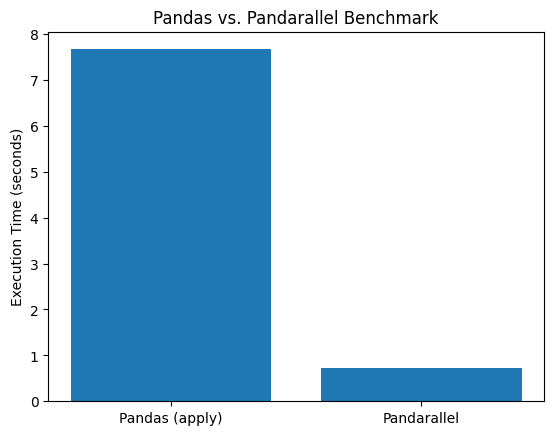

In [9]:
# Create a bar chart to visualize the results
methods = ['Pandas (apply)', 'Pandarallel']
execution_times = [pandas_time, pandarallel_time]

plt.bar(methods, execution_times)
plt.ylabel('Execution Time (seconds)')
plt.title('Pandas vs. Pandarallel Benchmark')

# Show the plot in the Jupyter Notebook
%matplotlib inline
plt.show()